In [57]:
%matplotlib widget

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:
# load the full dataset and display it
dataset = load_iris()
names = dataset.feature_names
data = dataset.data
target = dataset.target

print(names)
print(data.dtype, data)
print(target.dtype, target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
float64 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.

In [59]:
# preprocess the data to remove the third category so we have binary classification for now
index = np.searchsorted(target, 2)

data = data[:index]
target = target[:index].astype(np.float64) # convert to float64

print(names)
print("Data: ", data.shape, data.dtype)
print("Target:", target.shape, target.dtype)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data:  (100, 4) float64
Target: (100,) float64


With this new data, the goal is to not do logistic regression for now. Rather the goal is to use feature engineering to manually add the right features that allow us to make a better prediction. This is just a test to see if feature engineering can work and simulate logistic regression by doing linear regresion rather than doing logistic regression directly. 

The first is to try doing linear regression without any feature engineering and treat the classification values as floats and do a basic best of fit line. This will show us some insights.

In [60]:
reg = LinearRegression().fit(data, target) # use linear regression from scikit
predict = reg.predict(data)

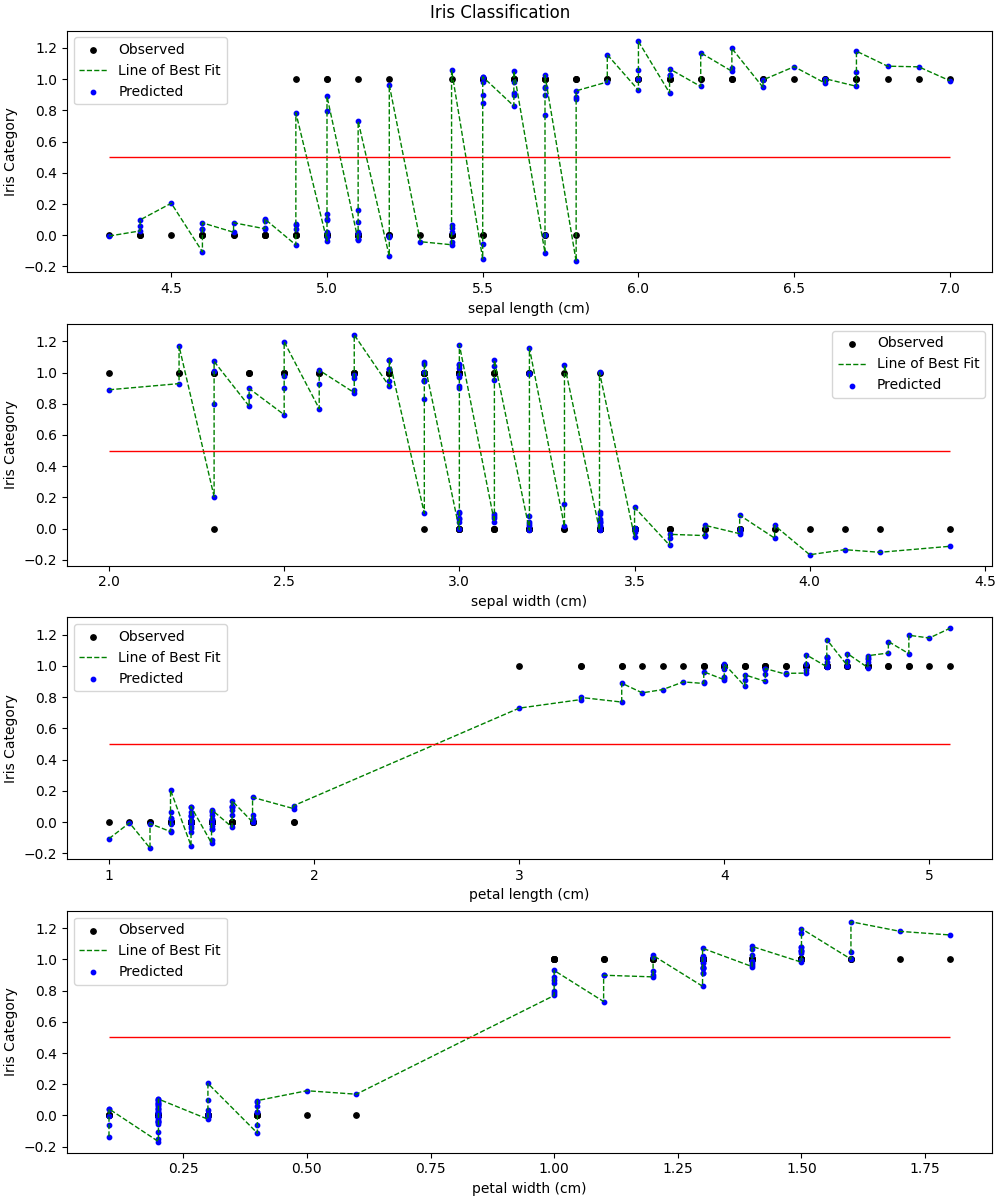

In [61]:
fig, axes = plt.subplots(4, layout="constrained",figsize=(10,12))
fig.suptitle("Iris Classification")
for i in range(4):
    axes[i].set_xlabel(names[i])
    axes[i].set_ylabel("Iris Category")

    idata, ipredict = zip(*sorted(zip(data[:,i], predict))) # sort the x and y values and retrieve them
    
    axes[i].scatter(data[:,i], target, c="black",s=15,label="Observed")
    axes[i].plot(idata, ipredict, c="g", linewidth=1, linestyle='--',label="Line of Best Fit")
    axes[i].scatter(data[:,i], predict, c="blue",s=10,label="Predicted")
    axes[i].hlines(y=0.5, xmin=np.min(data[:,i]), xmax=np.max(data[:,i]), linewidth=1, color='r')
    axes[i].legend()

The lines are a bit odd since there are multiple features. However, the more important thing is that our choice of a boundary is important. Also the data here doesn't really have any outliers. So in this case, the model fits fine. But if there were any outlier that was really far away from the mean, then we would see the line of best fit doesn't nearly work as good.

In [62]:
predict_classify = np.round(predict) # uses a boundary test of 0.5
misclassifications = np.sum(np.abs(target-predict_classify))
print("Errors:", misclassifications.astype(np.int32))

Errors: 0


Wow, we are so accurate that we have no points that were wrong. But now that I look at it, this is surely because there are multiple features that clearly help distinguish the different classifications. Let's only use one feature and see how accurate we are.

In [63]:
dataf1 = np.array([data[:,0]]).reshape((-1,1))
reg = LinearRegression().fit(dataf1, target) # use linear regression from scikit
predict = reg.predict(dataf1)

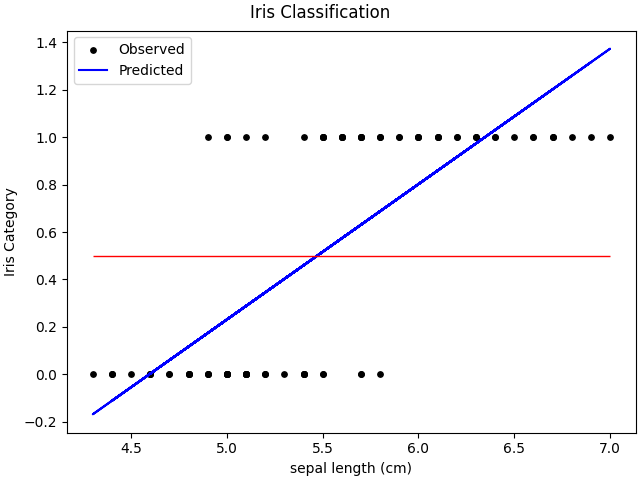

In [64]:
fig, axes = plt.subplots(layout="constrained")
fig.suptitle("Iris Classification")
axes.set_xlabel(names[0])
axes.set_ylabel("Iris Category")

axes.scatter(dataf1, target, c="black",s=15,label="Observed")
axes.plot(dataf1, predict, c="blue",label="Predicted")
axes.hlines(y=0.5, xmin=np.min(dataf1), xmax=np.max(dataf1), linewidth=1, color='r')
axes.legend()

In [65]:
predict_classify = np.round(predict) # uses a boundary test of 0.5
misclassifications = np.sum(np.abs(target-predict_classify))
print("Errors:", misclassifications.astype(np.int32))

Errors: 11


As expected, now we have a lot more misclassifications because the different classifications are more interspersed with each other in terms of sepal length. This isn't true for 3rd and 4th feature however. Now let's use a sigmoid function as an additional feature and see how the model fares.

In [66]:
data_sigmoid = np.hstack([dataf1, 1 / (1 + np.exp(-dataf1))]) # add sigmoid feature
reg = LinearRegression().fit(data_sigmoid, target)
predict = reg.predict(data_sigmoid)

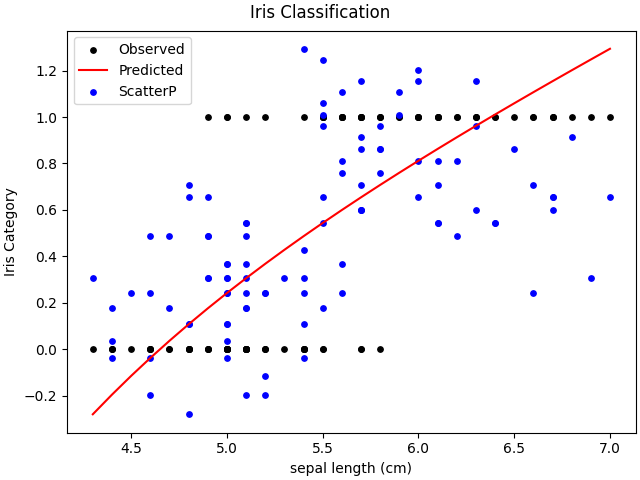

In [67]:
fig, axes = plt.subplots(layout="constrained")
fig.suptitle("Iris Classification")
axes.set_xlabel(names[0])
axes.set_ylabel("Iris Category")

idata, ipredict = zip(*sorted(zip(dataf1, predict)))
idata, itarget = zip(*sorted(zip(dataf1, target)))

axes.scatter(idata, itarget, c="black",s=15,label="Observed")
axes.plot(idata, ipredict, c="red",label="Predicted")
axes.scatter(idata, predict, c="blue",label="ScatterP",s=15)
# axes.hlines(y=0.5, xmin=np.min(data_sigmoid), xmax=np.max(data_sigmoid), linewidth=1, color='r')
axes.legend()

Unfortunately, with this we realize a crucial fact. Inserting sigmoid features doesn't work for a really important reason. When we add a new equation as a feature for linear regression, we must make sure that the weight associated with that function actually controls that function freely. This is actually the case for polynomials. If we add polynomial features, the weights fully control the polynomial. Unfortunately for sigmoid the weight of it doesn't control the twists and turns of sigmoid so even though the model tries only controlling the amplitude, it doesn't control the x term. For it to control everything, we must use a logistic regression model and derive the sigmoid function and create a custom cost function.

https://www.desmos.com/calculator/tnocrmysvd
This link shows insights into why the sigmoid feature doesn't work. If we only control the w parameter (weight), we immediately notice the issue. The model can't learn the parameters for the x value (c and b parameters) inside the sigmoid as the sigmoid is already pre computed. If you change c and b parameters, it's also obvious that sigmoid is fully controllable. Achieving this level of control is only possible if we create a new cost function based on the sigmoid.